# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
#importing some useful packages
import matplotlib.image as mpimg
import numpy as np
import cv2

# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../train.p'
validation_file = '../valid.p' 
testing_file = '../test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

train_data_dict = {}
for data in zip(X_train, y_train):
    if data[1] not in train_data_dict.keys():
        train_data_dict[data[1]] = [data[0]]
    else:
        train_data_dict[data[1]].append(data[0])
        
val_data_dict = {}
for data in zip(X_valid, y_valid):
    if data[1] not in val_data_dict.keys():
        val_data_dict[data[1]] = [data[0]]
    else:
        val_data_dict[data[1]].append(data[0])
        
test_data_dict = {}
for data in zip(X_test, y_test):
    if data[1] not in test_data_dict.keys():
        test_data_dict[data[1]] = [data[0]]
    else:
        test_data_dict[data[1]].append(data[0])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
"""
def show_grid(rows, cols):
    # show image of 10 random data points
    fig, axs = plt.subplots(rows,cols, figsize=(15, 6))
    fig.subplots_adjust(hspace = .2, wspace=.001)
    axs = axs.ravel()
    for i in range(10):
        index = random.randint(0, len(X_train))
        image = X_train[index]
        axs[i].axis('off')
        axs[i].imshow(image)
        axs[i].set_title(y_train[index])
"""

"\ndef show_grid(rows, cols):\n    # show image of 10 random data points\n    fig, axs = plt.subplots(rows,cols, figsize=(15, 6))\n    fig.subplots_adjust(hspace = .2, wspace=.001)\n    axs = axs.ravel()\n    for i in range(10):\n        index = random.randint(0, len(X_train))\n        image = X_train[index]\n        axs[i].axis('off')\n        axs[i].imshow(image)\n        axs[i].set_title(y_train[index])\n"

Training data shape = (34799, 32, 32, 3)
Training labels shape = (34799,) 

Test data shape = (12630, 32, 32, 3)
Test labels shape = (12630,) 

Validation data shape = (4410, 32, 32, 3)
Validation labels shape = (4410,) 



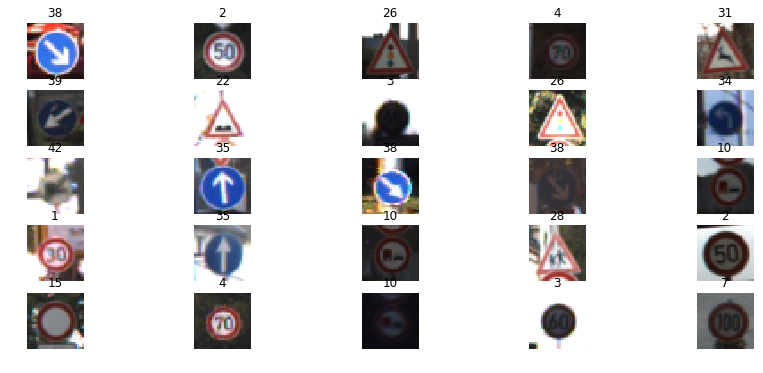

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

print("Training data shape =", X_train.shape)
print("Training labels shape =", y_train.shape,"\n")
print("Test data shape =", X_test.shape)
print("Test labels shape =", y_test.shape,"\n")
print("Validation data shape =", X_valid.shape)
print("Validation labels shape =", y_valid.shape,"\n")


#plt.imshow(X_train[1])
#print("label 1 =", y_train[1])

#histogram = plt.hist(y_train, normed=True, bins=)
#histogram = plt.ylabel('Classes');
#plt.show()

# show image of 10 random data points
fig, axs = plt.subplots(5,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(25):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])
    




Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. We want to have balanced data as much as possible. 

Training set histogram


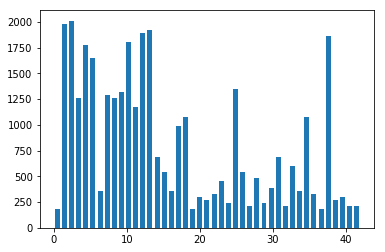

Number of bins: 44 

Bin boundaries:  [  0.           0.97674419   1.95348837   2.93023256   3.90697674
   4.88372093   5.86046512   6.8372093    7.81395349   8.79069767
   9.76744186  10.74418605  11.72093023  12.69767442  13.6744186
  14.65116279  15.62790698  16.60465116  17.58139535  18.55813953
  19.53488372  20.51162791  21.48837209  22.46511628  23.44186047
  24.41860465  25.39534884  26.37209302  27.34883721  28.3255814
  29.30232558  30.27906977  31.25581395  32.23255814  33.20930233
  34.18604651  35.1627907   36.13953488  37.11627907  38.09302326
  39.06976744  40.04651163  41.02325581  42.        ] 

Histogram counts: [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210] 

Validation set histogram


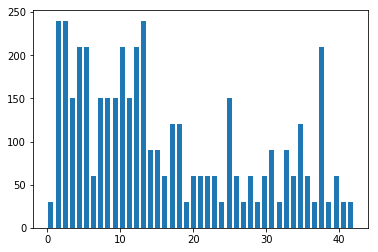

Number of bins: 44 

Bin boundaries:  [  0.           0.97674419   1.95348837   2.93023256   3.90697674
   4.88372093   5.86046512   6.8372093    7.81395349   8.79069767
   9.76744186  10.74418605  11.72093023  12.69767442  13.6744186
  14.65116279  15.62790698  16.60465116  17.58139535  18.55813953
  19.53488372  20.51162791  21.48837209  22.46511628  23.44186047
  24.41860465  25.39534884  26.37209302  27.34883721  28.3255814
  29.30232558  30.27906977  31.25581395  32.23255814  33.20930233
  34.18604651  35.1627907   36.13953488  37.11627907  38.09302326
  39.06976744  40.04651163  41.02325581  42.        ] 

Histogram counts: [ 30 240 240 150 210 210  60 150 150 150 210 150 210 240  90  90  60 120
 120  30  60  60  60  60  30 150  60  30  60  30  60  90  30  90  60 120
  60  30 210  30  60  30  30] 

Test set histogram


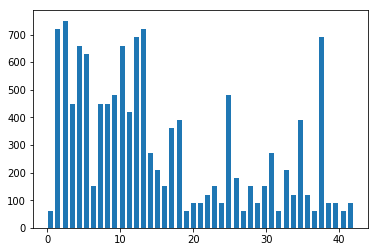

Number of bins: 44 

Bin boundaries:  [  0.           0.97674419   1.95348837   2.93023256   3.90697674
   4.88372093   5.86046512   6.8372093    7.81395349   8.79069767
   9.76744186  10.74418605  11.72093023  12.69767442  13.6744186
  14.65116279  15.62790698  16.60465116  17.58139535  18.55813953
  19.53488372  20.51162791  21.48837209  22.46511628  23.44186047
  24.41860465  25.39534884  26.37209302  27.34883721  28.3255814
  29.30232558  30.27906977  31.25581395  32.23255814  33.20930233
  34.18604651  35.1627907   36.13953488  37.11627907  38.09302326
  39.06976744  40.04651163  41.02325581  42.        ] 

Histogram counts: [ 60 720 750 450 660 630 150 450 450 480 660 420 690 720 270 210 150 360
 390  60  90  90 120 150  90 480 180  60 150  90 150 270  60 210 120 390
 120  60 690  90  90  60  90]


In [5]:
print("Training set histogram")
# histogram of label frequency
hist_train, bins_train = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins_train[1] - bins_train[0])
center = (bins_train[:-1] + bins_train[1:]) / 2
plt.bar(center, hist_train, align='center', width=width)
plt.show()
print("Number of bins:", len(bins_train),"\n")
print("Bin boundaries: ", bins_train, "\n")
print("Histogram counts:", hist_train,"\n")

print("Validation set histogram")
# histogram of label frequency
hist_val, bins_val = np.histogram(y_valid, bins=n_classes)
width = 0.7 * (bins_val[1] - bins_val[0])
center = (bins_val[:-1] + bins_val[1:]) / 2
plt.bar(center, hist_val, align='center', width=width)
plt.show()
print("Number of bins:", len(bins_val),"\n")
print("Bin boundaries: ", bins_val, "\n")
print("Histogram counts:", hist_val,"\n")

print("Test set histogram")
# histogram of label frequency
hist_test, bins_test = np.histogram(y_test, bins=n_classes)
width = 0.7 * (bins_test[1] - bins_test[0])
center = (bins_test[:-1] + bins_test[1:]) / 2
plt.bar(center, hist_test, align='center', width=width)
plt.show()
print("Number of bins:", len(bins_test),"\n")
print("Bin boundaries: ", bins_test, "\n")
print("Histogram counts:", hist_test)

As can be clearly seen above, Udacity made sure that the training, validation, and test data sets are roughly equally distributed across classes. Therefore, there's no need for me to attempt to rebalance the data.

Come up with multiple data sets for differ
ent experiments.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Balance the data.

In [6]:
# Undersampling

    

Preprocessing is key. Machine learning algorithm follow the garbage in garbage out principle. Your algorithm depends heavily on the type of training data you use.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Data normalization is required so that gradient descent will converge faster/properly during training
# However it is only really needed in the case when your features are on totally different scales of value
# See https://www.coursera.org/learn/deep-neural-network/lecture/lXv6U/normalizing-inputs for explanation
from sklearn.utils import shuffle

def gray_normal(input_img):
    output_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY) 
    output_img = cv2.equalizeHist(output_img)
    #cv2.normalize(output_img, output_img, 0, 255, cv2.NORM_MINMAX)
    #output_img = (output_img - 128)/ 128
    output_img = (output_img/128)-1
    #output_img = output_img.reshape(32,32,1)
    return output_img

#def gray_normal_list(input_img_list):
#    output_img_list = []
#    for input_img in input_img_list:
#        input_img = input_img.reshape(32,32,1)
#        output_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
#        cv2.normalize(output_img, output_img, 0, 255, cv2.NORM_MINMAX)
#        output_img_list.append(output_img)
#    return output_img_list

def perform_gray_normal(X,y):
    return_X, return_y = [], []
    for i in range(0,len(X)):
        # Create gray scaled normalized image
        img = gray_normal(X[i])
        # Add gray scaled normalized image
        return_X.append(img.reshape(32,32,1))
        return_y.append(y[i])
    return_X, return_y = shuffle(return_X, return_y)
    return_X = np.array(return_X)
    return_y = np.array(return_y)
    return return_X, return_y

First, let's take the default dataset provided by Udacity and create a grayscaled and normalized version

In [8]:
# Grayscale and normalize training data
X_train, y_train = perform_gray_normal(X_train, y_train)
print("Shape of X_train (10%):", X_train.shape)
print("Shape of y_train (10%):", y_train.shape)

# Grayscale and normalize validation data
X_valid, y_valid = perform_gray_normal(X_valid, y_valid)
print("Shape of X_valid (10%):", X_valid.shape)
print("Shape of y_valid (10%):", y_valid.shape)

# Grayscale and normalize test data
X_test, y_test = perform_gray_normal(X_test, y_test)
print("Shape of X_test (10%):", X_test.shape)
print("Shape of y_test (10%):", y_test.shape)

Shape of X_train (10%): (34799, 32, 32, 1)
Shape of y_train (10%): (34799,)
Shape of X_valid (10%): (4410, 32, 32, 1)
Shape of y_valid (10%): (4410,)
Shape of X_test (10%): (12630, 32, 32, 1)
Shape of y_test (10%): (12630,)


Now let's take the Udacity dataset and use it as a baseline to create an augmented dataset

In [9]:
# This is the data augmentation step in which I augment the training set with modified images.
# This does not need to be done for test and validation sets.
# For each of the techniques below (blurring, flipping, noise, etc.), how do I know how much 
# each of them is contributing to the robustness of my model? Furthermore, how do I know how much
# to blur, flip, add noise, etc.? Right now, I'm doing it arbitrarily. Is there a systematic way?
# Also, how do I know when I have augmented my data set enough?
import random

X_train_aug, y_train_aug = [],[]
for i in range (0,n_train):
    #if i==1: plt.imshow(X_train[i])
    # Create gray scaled normalized image
    #img = gray_normal(X_train[i])

    # Add gray scaled normalized image
    # I need to reshape images because the default TF LeNet architecture which I copy/pasted
    # complains otherwise...but why? Figure this out....
    #X_train_aug.append(img.reshape(32,32,1))
    #y_train_aug.append(y_train[i])

    # Add blurred image
    #for j in range(random.randint(1,10)):
    blur_shape = random.randint(1,15)
    if blur_shape %2 == 0: blur_shape -= 1
    blurred = cv2.GaussianBlur(X_train[i], (blur_shape, blur_shape), 0)
    X_train_aug.append(blurred.reshape(32,32,1))
    y_train_aug.append(y_train[i])

    ## Add flipped image
    ## Rotate 180 Degrees (Same as Flipping vertically and horizontally at the same time)
    #flipped = cv2.flip(X_train[i],-1)
    #X_train_aug.append(flipped.reshape(32,32,1))
    #y_train_aug.append(y_train[i])

    # Add noisy image
    #for j in range(random.randint(1,10)):
    noise = np.zeros_like(X_train[i])
    cv2.randn(noise,(random.randint(0,10)),(random.randint(15,25)))
    noisy_img = X_train[i]+noise
    X_train_aug.append(noisy_img.reshape(32,32,1))
    y_train_aug.append(y_train[i])

    # Add random brightness image
    shifted = X_train[i] + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    adjusted_img = shifted * coef - 1.0
    X_train_aug.append(adjusted_img.reshape(32,32,1))
    y_train_aug.append(y_train[i])

    # Scaled image
    rows,cols,_ = X_train[i].shape
    # transform limits
    px = np.random.randint(-2,2)
    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    scaled_img = cv2.warpPerspective(X_train[i],M,(rows,cols))
    scaled_img = scaled_img[:,:,np.newaxis]
    X_train_aug.append(scaled_img.reshape(32,32,1))
    y_train_aug.append(y_train[i])  
    
    # Warped image
    rows,cols,_ = X_train[i].shape
    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06
    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4
    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])
    M = cv2.getAffineTransform(pts1,pts2)
    warped_img = cv2.warpAffine(X_train[i],M,(cols,rows))
    warped_img = warped_img[:,:,np.newaxis]
    X_train_aug.append(warped_img.reshape(32,32,1))
    y_train_aug.append(y_train[i])
    
    #Translated image
    rows,cols,_ = X_train[i].shape
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    trans_img = cv2.warpAffine(X_train[i],M,(cols,rows))
    trans_img = trans_img[:,:,np.newaxis]
    X_train_aug.append(trans_img.reshape(32,32,1))
    y_train_aug.append(y_train[i]) 

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

Validation and test data only need to be preprocessed but not augmented. However, I am adding the "aug" suffix to the end of the dataset variable names for convenience.

In [10]:
X_valid_aug = X_valid
y_valid_aug = y_valid
X_test_aug = X_test
y_test_aug = y_test

Let's generate a dataset that performs augmentation but no rebalancing.

In [11]:
print("Shape of X_train_aug = ", X_train_aug.shape)
print("Shape of y_train_aug = ", y_train_aug.shape)
print("Shape of X_valid_aug = ", X_valid_aug.shape)
print("Shape of y_valid_aug = ", y_valid_aug.shape)
print("Shape of X_test_aug = ", X_test_aug.shape)
print("Shape of y_test_aug = ", y_test_aug.shape)

Shape of X_train_aug =  (208794, 32, 32, 1)
Shape of y_train_aug =  (208794,)
Shape of X_valid_aug =  (4410, 32, 32, 1)
Shape of y_valid_aug =  (4410,)
Shape of X_test_aug =  (12630, 32, 32, 1)
Shape of y_test_aug =  (12630,)


Let's generate a dataset that is 10% of the size of the original with no rebalancing. This may be useful later for rapid experimentation.

Andrej Karpathy said in one of his lectures that as a sanity check you should feed the network with very few samples from each class labels and in this way your model should over-fit (that is it performs very well in the training phase but not during test/validation phase). If you're not able to get very high accuracy by training with few samples (coming from each class) then that means something is broken (your implementation is not right).

In [12]:
# First, let's try and come up with a smaller dataset for faster training

import random 

def small_data(data_dict, data_hist):
    temp_x,temp_y = [],[]
    for key, val in data_dict.items():
        temp_x += random.sample(val, data_hist[key]//10)
        temp_y += data_hist[key]//10 * [key]
    return perform_gray_normal(temp_x, temp_y)

# Get 10% of training data
X_train_min, y_train_min = small_data(train_data_dict, hist_train)
print("Shape of X_train_min (10%):", X_train_min.shape)
print("Shape of y_train_min (10%):", y_train_min.shape)

# Get 10% of validation data
X_valid_min, y_valid_min = small_data(val_data_dict, hist_val)
print("Shape of X_valid_min (10%):", X_valid_min.shape)
print("Shape of y_valid_min (10%):", y_valid_min.shape)

# Get 10% of test data
X_test_min, y_test_min = small_data(test_data_dict,hist_test)
print("Shape of X_test_min (10%):", X_test_min.shape)
print("Shape of y_test_min (10%):", y_test_min.shape)


Shape of X_train_min (10%): (3479, 32, 32, 1)
Shape of y_train_min (10%): (3479,)
Shape of X_valid_min (10%): (441, 32, 32, 1)
Shape of y_valid_min (10%): (441,)
Shape of X_test_min (10%): (1263, 32, 32, 1)
Shape of y_test_min (10%): (1263,)


### Hardware Check

Let's do a a quick hardware check to make sure that my GPU is working. I have a laptop with an NVIDIA GeForce GT 740M GPU. Training time can be painfully slow even using this GPU since it is a small one so I absolutley can't afford to train on CPU. Furthermore, the NVIDIA drivers on my system can be very flakey and stop working from time to time so it is essential to make sure that my hardware is working right before attempting to train. Output should log to the terminal, not here in the notebook.

In [13]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Successful hardware detection looks like this on my system:

    I tensorflow/core/common_runtime/gpu/gpu_device.cc:975] Creating TensorFlow device (/gpu:0) -> (device: 0, name: GeForce GT 740M, pci bus id: 0000:01:00.0)
    Device mapping:
    /job:localhost/replica:0/task:0/gpu:0 -> device: 0, name: GeForce GT 740M, pci bus id: 0000:01:00.0
    I tensorflow/core/common_runtime/direct_session.cc:255] Device mapping:
    /job:localhost/replica:0/task:0/gpu:0 -> device: 0, name: GeForce GT 740M, pci bus id: 0000:01:00.0


### Model Architecture

First, I will try to use the default LeNet architecture with minimal modifcations to make it work with the traffic sign data set.

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
#X_train_g, y_train_g = shuffle(X_train_g, y_train_g)



def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    # Experiment with these values
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    ## SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    ## SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # The goal of this layer is to combine features detected from the image patches together for a particular task. 
    # In some (very simplified) sense, conv layers are smart feature extractors, and FC layers is the actual network.
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(9216, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

This is my modified LeNet architecture. If your network underfits your training data i.e. high loss, even after trying out different hyper parameters, then you should increase the complexity of the network. Complexity can be increased in 2 ways - increasing the number of layers or number of filters in existing layers. Some things I'm trying here: add dropout, remove max pooling,



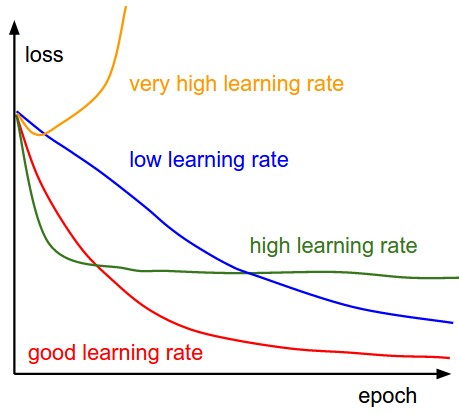

    how can i decide the dimensions of each layer, so i can choose the dimensions of the filter weights and dimensions of the strides “ksize” ?

This requires experimentation. Usually we use odd sizes like 3x3, 5x5, 7x7. Even numbered and bigger sizes are not usually used.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
#x = tf.placeholder(tf.float32, (32, 32))
y = tf.placeholder(tf.int32, (None))

# The purpose of one-hot encoding is to turn the label from an integer into
# a one-hot binary vector. This works better.
#one_hot_y = tf.one_hot(y, 10)
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
# Softmax function takes an N-dimensional vector of real numbers and transforms 
# it into a vector of real number in range (0,1) which add up to 1
# Just a measure of how different our logits are from the ground truth training labels
# https://sefiks.com/2017/12/17/a-gentle-introduction-to-cross-entropy-loss-function/
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# AVreages the cross entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)

# Adam optimizer is a little more sophisticated that stochastic gradient descent
# Good default choice for an optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# This averages the correctness of the batch's predictions so it can be used
# later to get the average correctness for the entire test set
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# This is for saving the trained model
saver = tf.train.Saver()

This is the function for evaluating the model.

In [16]:
def evaluate(accuracy_oper, X_data, y_data, BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_oper, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

This is the function for training the model

In [17]:
import time
def train_model(training_oper, accuracy_oper, saver,
                X_train_data, y_train_data, 
                X_valid_data, y_valid_data, 
                EPOCHS, BATCH_SIZE, label):
    
    start = time.time()
    print("X_train_data shape", X_train_data.shape)
    print("y_train_data shape", y_train_data.shape)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train_data)

        print("Training...")
        for i in range(EPOCHS):
            X_train_data, y_train_data = shuffle(X_train_data, y_train_data)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_data[offset:end], y_train_data[offset:end]
                sess.run(training_oper, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(accuracy_oper, X_valid_data, y_valid_data, BATCH_SIZE)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        saver.save(sess, './lenet_'+label)
        print("Model saved")
        end = time.time()
        print("Total training time in seconds:", end - start)

Now, perform the actual training. First, let's try with the dataset without augmentation. The images do need to be grayscaled and regularized first though. This takes a while for me....

In [ ]:
# https://arxiv.org/pdf/1804.07612.pdf
train_model(training_operation, accuracy_operation, saver,
            X_train_min, y_train_min, 
            X_valid_min, y_valid_min, 
            EPOCHS = 100, BATCH_SIZE = 256, 
            label = "min-data")

In [ ]:
# https://arxiv.org/pdf/1804.07612.pdf
train_model(training_operation, accuracy_operation, saver,
            X_train, y_train, 
            X_valid, y_valid, 
            EPOCHS = 30, BATCH_SIZE = 256, 
            label = "regular-data")

In [ ]:
# https://arxiv.org/pdf/1804.07612.pdf
train_model(training_operation, accuracy_operation, X_train_aug, y_train_aug, X_valid_aug, y_valid_aug, EPOCHS = 30, BATCH_SIZE = 256, label = "aug-data")

Let's test accuracy for LeNet. It should only be run once.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(accuracy_operation, X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Now, let's define and train a modified LeNet architecture.

Here are some of the techniques I'll use.

 

Dropout

https://pgaleone.eu/deep-learning/regularization/2017/01/10/anaysis-of-dropout/

The idea behind Dropout is to train an ensemble of DNNs and average the results of the whole ensemble instead of train a single DNN. The dropped neurons do not contribute to the training phase in both the forward and backward phases of back-propagation: for this reason **every time a single neuron is dropped out it’s like the training phase is done on a new network.**


In [ ]:
from tensorflow.contrib.layers import flatten

def LeNet_mod(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    # Experiment with these values
    mu = 0
    sigma = 0.1
    keep_prob = 0.5
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x12.
    # out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    ## SOLUTION: Pooling. Input = 30x30x12. Output = 15x15x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 15x15x12. Output = 13x13x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    ## SOLUTION: Pooling. Input = 13x13x32. Output = 6x6x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3: Convolutional. Input = 6x6x32. Output = 4x4x52.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 52), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(52))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b     
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)    
    ## SOLUTION: Pooling. Input = 4x4x52. Output = 2x2x52.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Flatten. Input = 2x2x52. Output = 208.
    fc0   = flatten(conv3)

    # The goal of this layer is to combine features detected from the image patches together for a particular task. 
    # In some (very simplified) sense, conv layers are smart feature extractors, and FC layers is the actual network.
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(208, 120), mean = mu, stddev = sigma))
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(9216, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

Now, I will try training again but this time on the modified LeNet architecture. Condensed into a single cell for brevity.

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y_mod = tf.one_hot(y, 43)
rate_mod = 0.001
logits_mod = LeNet_mod(x)
cross_entropy_mod = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y_mod, logits=logits_mod)
loss_operation_mod = tf.reduce_mean(cross_entropy_mod)
optimizer_mod = tf.train.AdamOptimizer(learning_rate = rate_mod)
training_operation_mod = optimizer.minimize(loss_operation_mod)
correct_prediction_mod = tf.equal(tf.argmax(logits_mod, 1), tf.argmax(one_hot_y_mod, 1))
accuracy_operation_mod = tf.reduce_mean(tf.cast(correct_prediction_mod, tf.float32))
saver_mod = tf.train.Saver()

Now, perform the actual training. First, let's try with the dataset without augmentation. The images do need to be grayscaled and regularized first though. This takes a while for me....

In [ ]:
# https://arxiv.org/pdf/1804.07612.pdf
train_model(training_operation_mod, accuracy_operation_mod, saver_mod,
            X_train_min, y_train_min, 
            X_valid_min, y_valid_min, 
            EPOCHS = 100, BATCH_SIZE = 256, 
            label = "mod_min-data")

In [ ]:
# https://arxiv.org/pdf/1804.07612.pdf
train_model(training_operation_mod, accuracy_operation_mod, saver_mod,
            X_train, y_train, 
            X_valid, y_valid, 
            EPOCHS = 30, BATCH_SIZE = 256, 
            label = "mod_regular-data")

In [ ]:
# https://arxiv.org/pdf/1804.07612.pdf
train_model(training_operation_mod, accuracy_operation_mod, saver_mod,
            X_train_aug, y_train_aug, 
            X_valid_aug, y_valid_aug, 
            EPOCHS = 30, BATCH_SIZE = 256, 
            label = "mod_aug-data")

Evaluate accuracy on the modfied network.

In [ ]:
with tf.Session() as sess:
    saver_mod.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy_mod = evaluate(accuracy_operation, X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy_mod))

In [18]:
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    keep_prob = 0.4
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400))
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(43))    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits


In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y_le2 = tf.one_hot(y, 43)
rate_le2 = 0.0009
logits_le2 = LeNet2(x)
cross_entropy_le2 = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y_le2, logits=logits_le2)
loss_operation_le2 = tf.reduce_mean(cross_entropy_le2)
optimizer_le2 = tf.train.AdamOptimizer(learning_rate = rate_le2)
training_operation_le2 = optimizer_le2.minimize(loss_operation_le2)
correct_prediction_le2 = tf.equal(tf.argmax(logits_le2, 1), tf.argmax(one_hot_y_le2, 1))
accuracy_operation_le2 = tf.reduce_mean(tf.cast(correct_prediction_le2, tf.float32))
saver_le2 = tf.train.Saver()

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


In [20]:
# https://arxiv.org/pdf/1804.07612.pdf
train_model(training_operation_le2, accuracy_operation_le2, saver_le2,
            X_train_min, y_train_min, 
            X_valid_min, y_valid_min, 
            EPOCHS = 100, BATCH_SIZE = 256, 
            label = "le2_min-data")

X_train_data shape (3479, 32, 32, 1)
y_train_data shape (3479,)
Training...
EPOCH 1 ...
Validation Accuracy = 0.095

EPOCH 2 ...
Validation Accuracy = 0.179

EPOCH 3 ...
Validation Accuracy = 0.302

EPOCH 4 ...
Validation Accuracy = 0.372

EPOCH 5 ...
Validation Accuracy = 0.410

EPOCH 6 ...
Validation Accuracy = 0.497

EPOCH 7 ...
Validation Accuracy = 0.549

EPOCH 8 ...
Validation Accuracy = 0.574

EPOCH 9 ...
Validation Accuracy = 0.585

EPOCH 10 ...
Validation Accuracy = 0.624

EPOCH 11 ...
Validation Accuracy = 0.642

EPOCH 12 ...
Validation Accuracy = 0.683

EPOCH 13 ...
Validation Accuracy = 0.676

EPOCH 14 ...
Validation Accuracy = 0.696

EPOCH 15 ...
Validation Accuracy = 0.701

EPOCH 16 ...
Validation Accuracy = 0.710

EPOCH 17 ...
Validation Accuracy = 0.701

EPOCH 18 ...
Validation Accuracy = 0.732

EPOCH 19 ...
Validation Accuracy = 0.698

EPOCH 20 ...
Validation Accuracy = 0.755

EPOCH 21 ...
Validation Accuracy = 0.748

EPOCH 22 ...
Validation Accuracy = 0.730

EPOCH 23 

KeyboardInterrupt: 

In [ ]:
# https://arxiv.org/pdf/1804.07612.pdf
train_model(training_operation_le2, accuracy_operation_le2, saver_le2,
            X_train, y_train, 
            X_valid, y_valid, 
            EPOCHS = 30, BATCH_SIZE = 256, 
            label = "le2_regular-data")

In [21]:
# https://arxiv.org/pdf/1804.07612.pdf
train_model(training_operation_le2, accuracy_operation_le2, saver_le2,
            X_train_aug, y_train_aug, 
            X_valid_aug, y_valid_aug, 
            EPOCHS = 30, BATCH_SIZE = 256, 
            label = "le2_aug-data")

X_train_data shape (208794, 32, 32, 1)
y_train_data shape (208794,)
Training...
EPOCH 1 ...
Validation Accuracy = 0.781

EPOCH 2 ...
Validation Accuracy = 0.868

EPOCH 3 ...
Validation Accuracy = 0.897

EPOCH 4 ...
Validation Accuracy = 0.907

EPOCH 5 ...
Validation Accuracy = 0.923

EPOCH 6 ...
Validation Accuracy = 0.924

EPOCH 7 ...
Validation Accuracy = 0.929

EPOCH 8 ...
Validation Accuracy = 0.934

EPOCH 9 ...
Validation Accuracy = 0.941

EPOCH 10 ...
Validation Accuracy = 0.940

EPOCH 11 ...
Validation Accuracy = 0.947

EPOCH 12 ...
Validation Accuracy = 0.947

EPOCH 13 ...
Validation Accuracy = 0.944

EPOCH 14 ...
Validation Accuracy = 0.942

EPOCH 15 ...
Validation Accuracy = 0.948

EPOCH 16 ...
Validation Accuracy = 0.950

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.947

EPOCH 19 ...
Validation Accuracy = 0.947

EPOCH 20 ...
Validation Accuracy = 0.952

EPOCH 21 ...
Validation Accuracy = 0.951

EPOCH 22 ...
Validation Accuracy = 0.948

EPOCH

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

internet_images = []
for file in glob.glob("./german_signs_from_internet/*"):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(32,32))
    internet_images.append(image)
    
fig, axs = plt.subplots(2,6, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(len(internet_images)):
    image = internet_images[i]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(i) 
    
for i in range(len(internet_images)):    
    #internet_images[i] = cv2.resize(internet_images[i],(32,32))
    internet_images[i] = gray_normal(internet_images[i])
internet_images = np.array(internet_images)
    
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(len(internet_images)):
    image = internet_images[i]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(i) 
print("Found",len(internet_images),"images downloaded from the internet.")

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
### Run the predictions here.
### Feel free to use as many code cells as needed.

my_labels = [3, 11, 1, 12, 38, 34, 18, 25]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(internet_images, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
def evaluate_internet_images(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples):
        accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

evaluate_internet_images()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

fig, axs = plt.subplots(8,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(my_images[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")